In [26]:
from pylab import array, linspace, subplots
from ddeint import ddeint
import numpy as np
import math

In [27]:
def model(Z,t,d):
    w=1
    theta=0
    
    # I've commented out these two things because you don't need them. 
    # They are reduntant due to the line below them.
    #x=Z[0]
    #v=Z[1]
    x,v=Z(t)
    xd,vd=Z(t-d)
    # In the return call below, I have replaced Z[1] with v, and Z[0] with x 
    # because you have already defined those in your function so you might as 
    # well use them.
    return array([v+(math.cos(theta)*w),(-np.sign(v+(math.cos(theta)*w))*(v+(math.cos(theta)*w))**2)-xd])

The lambda call is actually quite an advanced concept in programming. It is a subset of programming called functional programming. You can read more about it here (https://realpython.com/python-lambda/). In functional programming, a function can call itself and so whatever is returned by a function programmed this way is also its first argument. It defines a different way to do recursion. 

In [28]:
#g = lambda t : array([Z[1]+(math.cos(theta)*w),(-np.sign(Z[1]+(math.cos(theta)*w))*(Z[1]+(math.cos(theta)*w))**2)-Z[0]
#    ])
g = lambda t: array([1, 2])
tt = np.linspace(0,100,1000)

In [29]:
d = 0.25
yy = ddeint(model,g,tt,fargs=(d,))

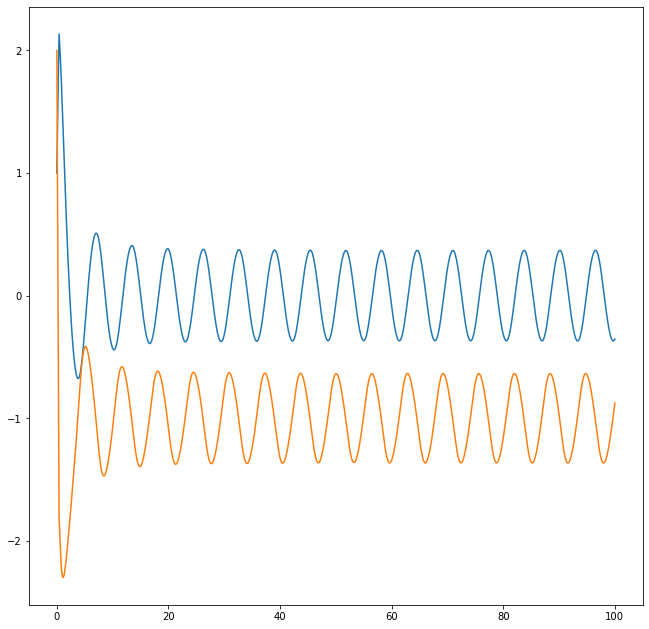

In [31]:
# Here's a basic plot wrt to time:
fig, ax = subplots(1, figsize=(11, 11))
ax.plot(tt, yy)

I think this error is because you need two delays even though only one variable has the delay.

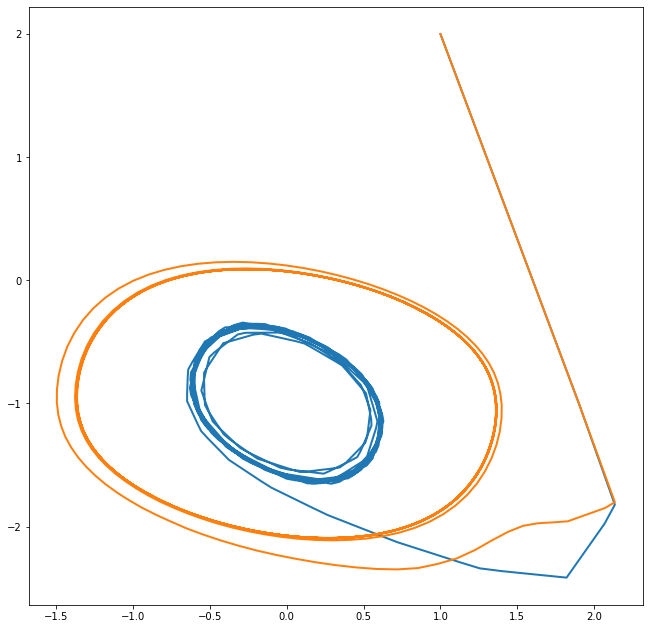

In [33]:
# This code is for making the plot in phase plane for two different values of the delay.
fig, ax = subplots(1, figsize=(11, 11))
for d in [0, 1]:
    yy = ddeint(model,g,tt,fargs=(d,))
    ax.plot(yy[:,0], yy[:, 1], lw=2, label="delay = %.01f" % d)